# Importing Basics Libraries

In [1]:
import numpy as np 
import pandas as pd

In [4]:
cd Desktop

/Users/imac/Desktop


# Reading Training Data from Train Folder

In [6]:
path=[]
label=[]
import os
for dirname, _, filenames in os.walk('/Users/imac/Desktop/image-dataset/_train'):
    for filename in filenames:
        if ((os.path.basename(dirname))!="cat"):
            path.append(os.path.join(dirname, filename))    
            label.append(os.path.basename(dirname))

In [7]:
len(path)
len(label)

5162

# Making a Dataframe of Training data

In [8]:
df_train = pd.DataFrame(list(zip(path, label)), 
               columns =['Path', 'Label'])

In [9]:
df_train

,Path,Label
0,/Users/imac/Desktop/image-dataset/_train/car/c...,car
1,/Users/imac/Desktop/image-dataset/_train/car/c...,car
2,/Users/imac/Desktop/image-dataset/_train/car/c...,car
3,/Users/imac/Desktop/image-dataset/_train/car/c...,car
4,/Users/imac/Desktop/image-dataset/_train/car/c...,car
...,...,...
5157,/Users/imac/Desktop/image-dataset/_train/airpl...,airplane
5158,/Users/imac/Desktop/image-dataset/_train/airpl...,airplane
5159,/Users/imac/Desktop/image-dataset/_train/airpl...,airplane
5160,/Users/imac/Desktop/image-dataset/_train/airpl...,airplane


In [10]:
df_train['Path'][5161]

'/Users/imac/Desktop/image-dataset/_train/airplane/airplane_0379.jpg'

In [11]:
piechart=df_train.groupby(['Label']).count()
piechart

,Path
Label,
airplane,619
car,871
dog,597
flower,717
fruit,850
motorbike,670
person,838


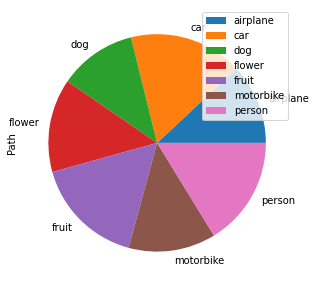

In [12]:
plot = piechart.plot.pie(y='Path', figsize=(5, 5))


# Shuffling Training Dataframe

In [13]:
from sklearn.utils import shuffle
df_train = shuffle(df_train)

In [14]:
df_train

,Path,Label
1380,/Users/imac/Desktop/image-dataset/_train/fruit...,fruit
3214,/Users/imac/Desktop/image-dataset/_train/flowe...,flower
4299,/Users/imac/Desktop/image-dataset/_train/motor...,motorbike
4999,/Users/imac/Desktop/image-dataset/_train/airpl...,airplane
3024,/Users/imac/Desktop/image-dataset/_train/perso...,person
...,...,...
1825,/Users/imac/Desktop/image-dataset/_train/dog/d...,dog
2251,/Users/imac/Desktop/image-dataset/_train/dog/d...,dog
4875,/Users/imac/Desktop/image-dataset/_train/airpl...,airplane
172,/Users/imac/Desktop/image-dataset/_train/car/c...,car


# Reading Test Data from Test Folder

In [15]:
path=[]
label=[]
import os
for dirname, _, filenames in os.walk('/Users/imac/Desktop/image-dataset/_test'):
    for filename in filenames:
        if ((os.path.basename(dirname))!="cat"):
            path.append(os.path.join(dirname, filename))    
            label.append(os.path.basename(dirname))

# Making a dataframe of testing data 

In [16]:

df_test = pd.DataFrame(list(zip(path, label)), 
               columns =['Path', 'Label'])


In [17]:
piechart=df_test.groupby(['Label']).count()
piechart

,Path
Label,
airplane,108
car,97
dog,105
flower,126
fruit,150
motorbike,118
person,148


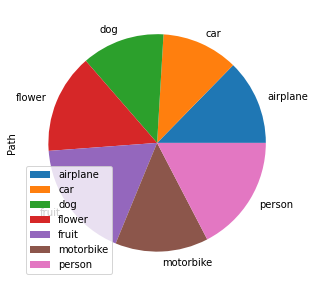

In [18]:
plot = piechart.plot.pie(y='Path', figsize=(5, 5))

# Shuffling Test Dataframe

In [19]:
df_test = shuffle(df_test)

In [20]:
df_test

,Path,Label
570,/Users/imac/Desktop/image-dataset/_test/flower...,flower
469,/Users/imac/Desktop/image-dataset/_test/person...,person
443,/Users/imac/Desktop/image-dataset/_test/person...,person
418,/Users/imac/Desktop/image-dataset/_test/person...,person
369,/Users/imac/Desktop/image-dataset/_test/person...,person
...,...,...
677,/Users/imac/Desktop/image-dataset/_test/motorb...,motorbike
639,/Users/imac/Desktop/image-dataset/_test/motorb...,motorbike
450,/Users/imac/Desktop/image-dataset/_test/person...,person
31,/Users/imac/Desktop/image-dataset/_test/car/ca...,car


# AlexNet Implementation


## Take Images in Batches

In [180]:
from keras_preprocessing.image import ImageDataGenerator

In [181]:
datagen=ImageDataGenerator(rescale=1./255.)

In [237]:
train_generator=datagen.flow_from_dataframe(
dataframe=df_train,
directory=None,
x_col="Path",
y_col="Label",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(227,227)) 

test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
dataframe=df_test,
directory=None,
x_col="Path",
y_col="Label",
batch_size=32,
seed=42,
shuffle=False,
class_mode="categorical",
target_size=(227,227))

Found 5162 validated image filenames belonging to 7 classes.
Found 852 validated image filenames belonging to 7 classes.


Note: target size = (227,227) because AlexNet takes input size of (227,227)

In [183]:
test_generator.class_indices

{'airplane': 0,
 'car': 1,
 'dog': 2,
 'flower': 3,
 'fruit': 4,
 'motorbike': 5,
 'person': 6}

In [184]:
train_generator.class_indices

{'airplane': 0,
 'car': 1,
 'dog': 2,
 'flower': 3,
 'fruit': 4,
 'motorbike': 5,
 'person': 6}

In [185]:
train_generator.image_shape

(227, 227, 3)

In [111]:
train_generator

# AlexNet Model Defining

In [186]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Softmax
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

In [187]:
model = Sequential([
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(7, activation='softmax')
])

In [188]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization_25 (Batc (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_26 (Batc (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 13, 13, 384)      

In [190]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])

In [191]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=30
)

Epoch 1/30
161/161 [==============================] - 13s 79ms/step - loss: 1.8344 - accuracy: 0.2875
Epoch 2/30
161/161 [==============================] - 13s 79ms/step - loss: 1.5576 - accuracy: 0.3895
Epoch 3/30
161/161 [==============================] - 13s 79ms/step - loss: 1.3989 - accuracy: 0.4737
Epoch 4/30
161/161 [==============================] - 13s 79ms/step - loss: 1.2908 - accuracy: 0.5115
Epoch 5/30
161/161 [==============================] - 13s 84ms/step - loss: 1.1908 - accuracy: 0.5439
Epoch 6/30
161/161 [==============================] - 13s 80ms/step - loss: 1.0880 - accuracy: 0.5971
Epoch 7/30
161/161 [==============================] - 12s 77ms/step - loss: 0.9876 - accuracy: 0.6425
Epoch 8/30
161/161 [==============================] - 13s 80ms/step - loss: 0.9270 - accuracy: 0.6635
Epoch 9/30
161/161 [==============================] - 13s 82ms/step - loss: 0.8253 - accuracy: 0.6959
Epoch 10/30
161/161 [==============================] - 13s 80ms/step - loss: 0.777

# Test Accuracy

In [192]:
model.evaluate_generator(generator=test_generator,
steps=STEP_SIZE_TEST)

[0.11320384591817856, 0.9747596383094788]

# Predict Label of an Image

ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_12 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape [None, None, None, 3]


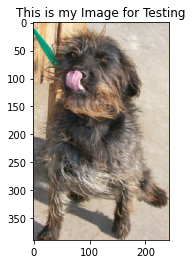

In [236]:
# print(type(test_generator.next()[0][0]))
import matplotlib.pyplot as plt
from keras.preprocessing import image
from PIL import Image
test_image = image.load_img('../input/image-dataset/_train/dog/dog_0150.jpg') #Enter Path of any Image
plt.imshow(test_image)
plt.title('This is my Image for Testing')
test_image = test_image.resize((227, 227), Image.ANTIALIAS)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
print("This Image Belongs to Label: ",model.predict_classes(test_image)[0])

In [ ]:
'airplane': 0,
 'car': 1,
 'dog': 2,
 'flower': 3,
 'fruit': 4,
 'motorbike': 5,
 'person': 6}

In [90]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)


17/17 [==============================] - 2s 123ms/step


#  **LeNet Implementation**

In [34]:
import keras
import tensorflow as tf
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [35]:
datagen=ImageDataGenerator(rescale=1./255.)

In [36]:
train_generator=datagen.flow_from_dataframe(
dataframe=df_train,
directory=None,
x_col="Path",
y_col="Label",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
dataframe=df_test,
directory=None,
x_col="Path",
y_col="Label",
batch_size=32,
seed=42,
shuffle=False,
class_mode="categorical",
target_size=(32,32))

Found 5162 validated image filenames belonging to 7 classes.
Found 852 validated image filenames belonging to 7 classes.


In [53]:
x=train_generator[0][0]
x.shape

(32, 32, 32, 3)

In [54]:
model_LeNet = keras.Sequential()

model_LeNet.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model_LeNet.add(layers.AveragePooling2D())

model_LeNet.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model_LeNet.add(layers.AveragePooling2D())

model_LeNet.add(layers.Flatten())

model_LeNet.add(layers.Dense(units=120, activation='relu'))

model_LeNet.add(layers.Dense(units=84, activation='relu'))

model_LeNet.add(layers.Dense(units=7, activation = 'softmax'))

In [55]:
model_LeNet.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 6)         168       
_________________________________________________________________
average_pooling2d_4 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_5 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

In [56]:
model_LeNet.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])

In [57]:

"""checkpoint_filepath = './Checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
#model.fit(epochs=EPOCHS, callbacks=[model_checkpoint_callback])

# The model weights (that are considered the best) are loaded into the model.
#model.load_weights(checkpoint_filepath)"""

"checkpoint_filepath = './Checkpoint'\nmodel_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(\n    filepath=checkpoint_filepath,\n    save_weights_only=False,\n    monitor='val_accuracy',\n    mode='max',\n    save_best_only=True)\n\n# Model weights are saved at the end of every epoch, if it's the best seen\n# so far.\n#model.fit(epochs=EPOCHS, callbacks=[model_checkpoint_callback])\n\n# The model weights (that are considered the best) are loaded into the model.\n#model.load_weights(checkpoint_filepath)"

In [58]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
model_LeNet.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=100
)

Epoch 1/100
161/161 [==============================] - 8s 48ms/step - loss: 1.9301 - accuracy: 0.1682
Epoch 2/100
161/161 [==============================] - 8s 49ms/step - loss: 1.9097 - accuracy: 0.1690
Epoch 3/100
161/161 [==============================] - 8s 50ms/step - loss: 1.8896 - accuracy: 0.1803
Epoch 4/100
161/161 [==============================] - 8s 47ms/step - loss: 1.8666 - accuracy: 0.2103
Epoch 5/100
161/161 [==============================] - 8s 48ms/step - loss: 1.8396 - accuracy: 0.2556
Epoch 6/100
161/161 [==============================] - 8s 48ms/step - loss: 1.8054 - accuracy: 0.3084
Epoch 7/100
161/161 [==============================] - 8s 49ms/step - loss: 1.7590 - accuracy: 0.3573
Epoch 8/100
161/161 [==============================] - 8s 48ms/step - loss: 1.6989 - accuracy: 0.4101
Epoch 9/100
161/161 [==============================] - 8s 48ms/step - loss: 1.6231 - accuracy: 0.4645
Epoch 10/100
161/161 [==============================] - 8s 48ms/step - loss: 1.536

In [60]:
pwd

'/Users/imac/Desktop'

In [61]:
model_LeNet.save("LeNet-model")

INFO:tensorflow:Assets written to: LeNet-model/assets


In [62]:
# It can be used to reconstruct the model identically.
reconstructed_model = tf.keras.models.load_model("LeNet-model")

In [63]:
reconstructed_model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=100)

Epoch 1/100
161/161 [==============================] - 8s 48ms/step - loss: 0.4656 - accuracy: 0.8292
Epoch 2/100
161/161 [==============================] - 8s 48ms/step - loss: 0.4630 - accuracy: 0.8341
Epoch 3/100
161/161 [==============================] - 8s 48ms/step - loss: 0.4574 - accuracy: 0.8347
Epoch 4/100
161/161 [==============================] - 8s 48ms/step - loss: 0.4561 - accuracy: 0.8365
Epoch 5/100
161/161 [==============================] - 8s 48ms/step - loss: 0.4573 - accuracy: 0.8310
Epoch 6/100
161/161 [==============================] - 8s 47ms/step - loss: 0.4559 - accuracy: 0.8335
Epoch 7/100
161/161 [==============================] - 8s 48ms/step - loss: 0.4508 - accuracy: 0.8386
Epoch 8/100
161/161 [==============================] - 8s 48ms/step - loss: 0.4501 - accuracy: 0.8372
Epoch 9/100
161/161 [==============================] - 8s 48ms/step - loss: 0.4457 - accuracy: 0.8384
Epoch 10/100
161/161 [==============================] - 8s 48ms/step - loss: 0.443

In [64]:
reconstructed_model.save("reconstructed_LeNet_model")

INFO:tensorflow:Assets written to: reconstructed_LeNet_model/assets


In [72]:
newconstructed_model = tf.keras.models.load_model("reconstructed_LeNet_model")

In [67]:
newconstructed_model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=100)

Epoch 1/100
161/161 [==============================] - 8s 48ms/step - loss: 0.2761 - accuracy: 0.9002
Epoch 2/100
161/161 [==============================] - 8s 47ms/step - loss: 0.2750 - accuracy: 0.9008
Epoch 3/100
161/161 [==============================] - 7s 46ms/step - loss: 0.2761 - accuracy: 0.8984
Epoch 4/100
161/161 [==============================] - 8s 47ms/step - loss: 0.2722 - accuracy: 0.9023
Epoch 5/100
161/161 [==============================] - 8s 47ms/step - loss: 0.2700 - accuracy: 0.9033
Epoch 6/100
161/161 [==============================] - 8s 47ms/step - loss: 0.2671 - accuracy: 0.9062
Epoch 7/100
161/161 [==============================] - 7s 46ms/step - loss: 0.2683 - accuracy: 0.9023
Epoch 8/100
161/161 [==============================] - 8s 47ms/step - loss: 0.2685 - accuracy: 0.9018
Epoch 9/100
161/161 [==============================] - 8s 48ms/step - loss: 0.2668 - accuracy: 0.9023
Epoch 10/100
161/161 [==============================] - 8s 47ms/step - loss: 0.267

In [68]:
newconstructed_model.save("newconstructed_LeNet_model")

INFO:tensorflow:Assets written to: newconstructed_LeNet_model/assets


In [69]:
newnewconstructed_model = tf.keras.models.load_model("newconstructed_LeNet_model")

In [70]:
newnewconstructed_model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=100)

Epoch 1/100
161/161 [==============================] - 8s 49ms/step - loss: 0.1658 - accuracy: 0.9431
Epoch 2/100
161/161 [==============================] - 8s 47ms/step - loss: 0.1675 - accuracy: 0.9400
Epoch 3/100
161/161 [==============================] - 8s 47ms/step - loss: 0.1683 - accuracy: 0.9404
Epoch 4/100
161/161 [==============================] - 8s 47ms/step - loss: 0.1672 - accuracy: 0.9392
Epoch 5/100
161/161 [==============================] - 7s 46ms/step - loss: 0.1675 - accuracy: 0.9386
Epoch 6/100
161/161 [==============================] - 8s 47ms/step - loss: 0.1578 - accuracy: 0.9487
Epoch 7/100
161/161 [==============================] - 8s 47ms/step - loss: 0.1687 - accuracy: 0.9396
Epoch 8/100
161/161 [==============================] - 8s 50ms/step - loss: 0.1709 - accuracy: 0.9366
Epoch 9/100
161/161 [==============================] - 8s 50ms/step - loss: 0.1622 - accuracy: 0.9413
Epoch 10/100
161/161 [==============================] - 8s 49ms/step - loss: 0.160

In [114]:
newnewconstructed_model.save("ultimate_LeNet_model")

INFO:tensorflow:Assets written to: ultimate_LeNet_model/assets


In [113]:
import os
os.chdir("/Users/imac/Desktop")

In [74]:
newnewconstructed_model.evaluate_generator(generator=test_generator,
steps=STEP_SIZE_TEST)

[0.501259446144104, 0.8533653616905212]

In [112]:
pwd

'/Users/imac/Desktop'

In [80]:
cd image-dataset

[Errno 2] No such file or directory: 'image-dataset'
/Users/imac/Desktop/image-dataset


In [88]:
ls

cat_0071.jpg  cat_0089.jpg  cat_0107.jpg  cat_0125.jpg  cat_0143.jpg
cat_0072.jpg  cat_0090.jpg  cat_0108.jpg  cat_0126.jpg  cat_0144.jpg
cat_0073.jpg  cat_0091.jpg  cat_0109.jpg  cat_0127.jpg  cat_0145.jpg
cat_0074.jpg  cat_0092.jpg  cat_0110.jpg  cat_0128.jpg  cat_0146.jpg
cat_0075.jpg  cat_0093.jpg  cat_0111.jpg  cat_0129.jpg  cat_0147.jpg
cat_0076.jpg  cat_0094.jpg  cat_0112.jpg  cat_0130.jpg  cat_0148.jpg
cat_0077.jpg  cat_0095.jpg  cat_0113.jpg  cat_0131.jpg  cat_0149.jpg
cat_0078.jpg  cat_0096.jpg  cat_0114.jpg  cat_0132.jpg  cat_0150.jpg
cat_0079.jpg  cat_0097.jpg  cat_0115.jpg  cat_0133.jpg  cat_0151.jpg
cat_0080.jpg  cat_0098.jpg  cat_0116.jpg  cat_0134.jpg  cat_0152.jpg
cat_0081.jpg  cat_0099.jpg  cat_0117.jpg  cat_0135.jpg  cat_0153.jpg
cat_0082.jpg  cat_0100.jpg  cat_0118.jpg  cat_0136.jpg  cat_0154.jpg
cat_0083.jpg  cat_0101.jpg  cat_0119.jpg  cat_0137.jpg  cat_0155.jpg
cat_0084.jpg  cat_0102.jpg  cat_0120.jpg  cat_0138.jpg  cat_0156.jpg
cat_0085.jpg  cat_0103.jpg  cat_01

Predicted Class is
3


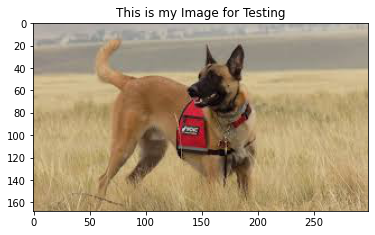

In [102]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
from PIL import Image
test_image = image.load_img('/Users/imac/Desktop/dog.jpeg')
plt.imshow(test_image)
plt.title('This is my Image for Testing')
test_image = test_image.resize((32, 32), Image.ANTIALIAS)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
print("Predicted Class is")
print(newnewconstructed_model.predict_classes(test_image)[0])

In [ ]:
'airplane': 0,
 'car': 1,
 'dog': 2,
 'flower': 3,
 'fruit': 4,
 'motorbike': 5,
 'person': 6}